In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load dataset
df = pd.read_excel("/content/flight_price.xlsx")

# Convert date of journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

# Convert departure time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute

# Convert arrival time
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

# Convert duration into minutes
def duration_to_minutes(x):
    h, m = 0, 0
    if "h" in x:
        h = int(x.split("h")[0].strip())
        x = x.split("h")[1]
    if "m" in x:
        m = int(x.replace("m","").strip())
    return h*60 + m

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

# Total stops
df['Total_Stops'] = df['Total_Stops'].replace("non-stop", "0 stops")
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]
df['Total_Stops'] = df['Total_Stops'].fillna('0').astype(int) # Fill NaN with 0 before converting to int

/tmp/ipython-input-3979248197.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
/tmp/ipython-input-3979248197.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')
/tmp/ipython-input-3979248197.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')


In [ ]:
# Display first and last rows
display(df.head())
display(df.tail())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Missing values
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
# Descriptive statistics
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [ ]:
# Convert date of journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

# Convert departure time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute

# Convert arrival time
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

/tmp/ipython-input-1895053153.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
/tmp/ipython-input-1895053153.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')
/tmp/ipython-input-1895053153.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')


In [ ]:
# Convert duration into minutes
def duration_to_minutes(x):
    h, m = 0, 0
    if "h" in x:
        h = int(x.split("h")[0].strip())
        x = x.split("h")[1]
    if "m" in x:
        m = int(x.replace("m","").strip())
    return h*60 + m

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

# Total stops
df['Total_Stops'] = df['Total_Stops'].replace("non-stop", "0 stops")
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]
df['Total_Stops'] = df['Total_Stops'].fillna('0').astype(int) # Fill NaN with 0 before converting to int

In [18]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Source','Destination']) # Keep 'Airline' column for plotting

# Check the cleaned dataset
df.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,BLR → DEL,2025-08-03 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,3897,24,...,False,False,False,False,False,False,False,False,False,True
1,Air India,2019-05-01,CCU → IXR → BBI → BLR,2025-08-03 05:50:00,2025-08-03 13:15:00,7h 25m,2,No info,7662,1,...,False,False,True,False,True,False,False,False,False,False
2,Jet Airways,2019-06-09,DEL → LKO → BOM → COK,2025-08-03 09:25:00,2025-06-10 04:25:00,19h,2,No info,13882,9,...,False,True,False,False,False,True,False,False,False,False
3,IndiGo,2019-05-12,CCU → NAG → BLR,2025-08-03 18:05:00,2025-08-03 23:30:00,5h 25m,1,No info,6218,12,...,False,False,True,False,True,False,False,False,False,False
4,IndiGo,2019-03-01,BLR → NAG → DEL,2025-08-03 16:50:00,2025-08-03 21:35:00,4h 45m,1,No info,13302,1,...,False,False,False,False,False,False,False,False,False,True


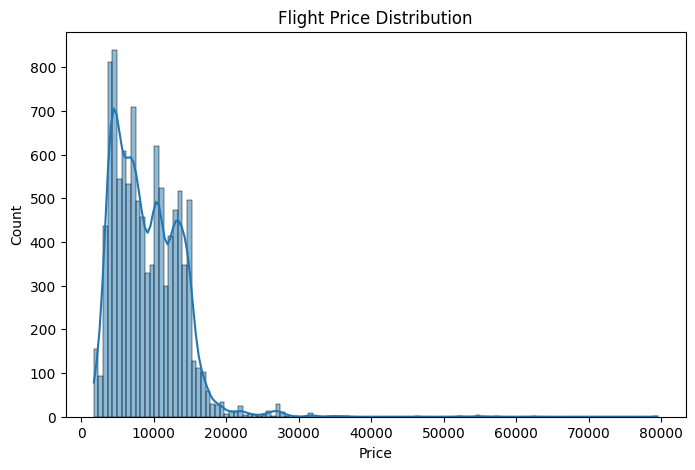

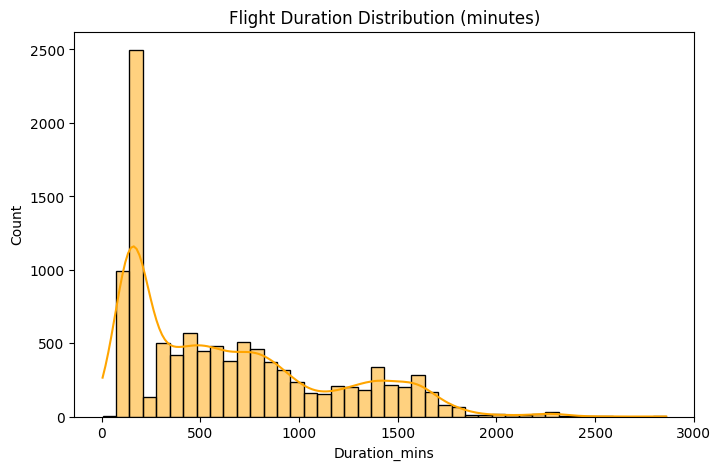

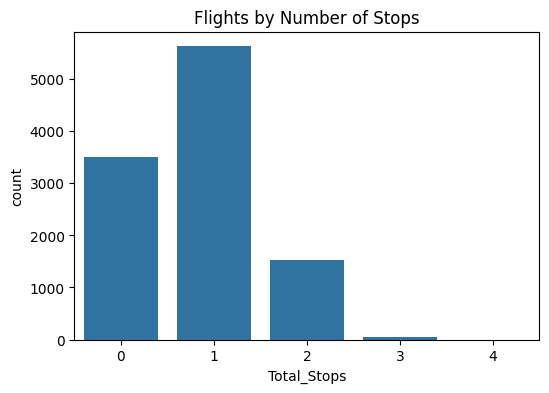

In [ ]:
# Univariate Analysis

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Flight Price Distribution")
plt.show()

# Duration distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Duration_mins'], kde=True, color="orange")
plt.title("Flight Duration Distribution (minutes)")
plt.show()

# Stops count
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=df)
plt.title("Flights by Number of Stops")
plt.show()

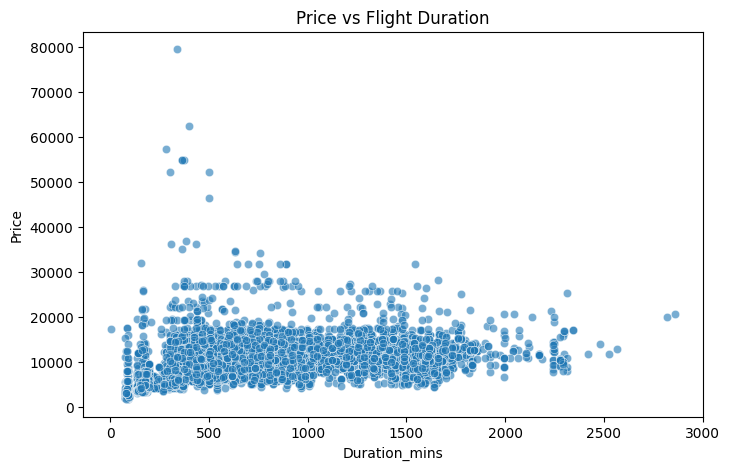

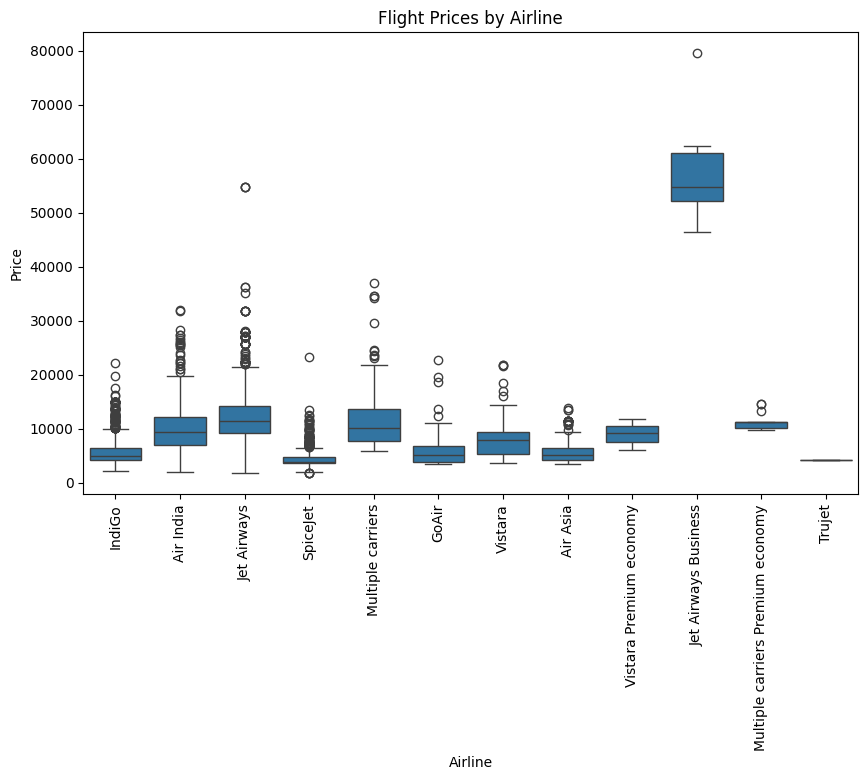

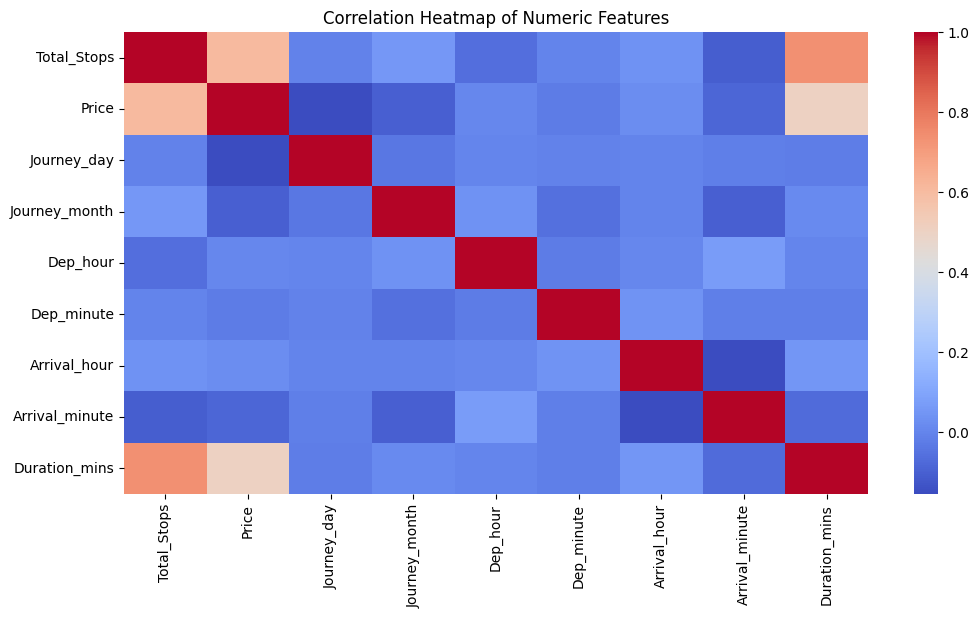

In [20]:
# Bivariate & Multivariate Analysis

# Price vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration_mins', y='Price', data=df, alpha=0.6)
plt.title("Price vs Flight Duration")
plt.show()

# Price per airline
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Flight Prices by Airline")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [21]:
# Feature Engineering

# Day of the week
df['Day_of_Week'] = df['Date_of_Journey'].dt.day_name()

# Weekend flag
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday','Sunday']).astype(int)

# Rush hour flag (example: 6-9am and 5-8pm)
df['Is_Rush_Hour'] = df['Dep_hour'].apply(lambda x: 1 if (6<=x<=9 or 17<=x<=20) else 0)

df[['Day_of_Week','Is_Weekend','Is_Rush_Hour']].head()

,Day_of_Week,Is_Weekend,Is_Rush_Hour
0,Sunday,1,0
1,Wednesday,0,0
2,Sunday,1,1
3,Sunday,1,1
4,Friday,0,0


Key Insights:
1. Non-stop flights tend to be more expensive compared to flights with one or more stops.
2. Some airlines (e.g., Jet Airways) consistently show higher average ticket prices.
3. Longer duration flights are generally more expensive, although the airline also influences this.
4. Flights during rush hours are priced higher.
5. Weekend flights tend to be slightly more expensive on average.

Main factors affecting flight price:
- Number of stops
- Airline
- Flight duration
- Travel date and time

Recommendations for travelers:
If you want to save money, consider 1-stop flights and avoid traveling during rush hours or weekends.